In [1]:
import numpy as np
import random
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import fetch_20newsgroups
np.random.seed(42)
random.seed(42)

categories = ['comp.graphics',
'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware',
'comp.sys.mac.hardware','rec.autos',
'rec.motorcycles','rec.sport.baseball',
'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
print(newsgroups_train.target_names)

['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']


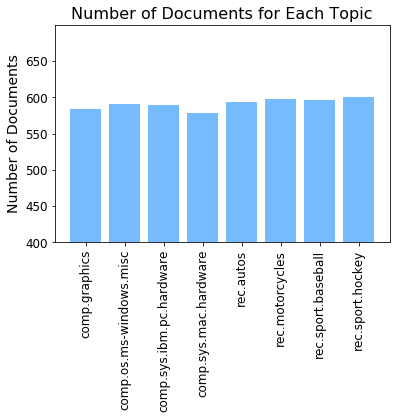

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

unique, counts = np.unique(newsgroups_train.target, return_counts=True)
plt.bar(unique, counts, align='center', tick_label=newsgroups_train.target_names, color='xkcd:sky blue')
plt.title('Number of Documents for Each Topic')
plt.ylabel('Number of Documents')
plt.ylim([400,700])
plt.xticks(rotation='vertical')
plt.yticks(np.arange(400, 700, 50))
plt.show()


In [10]:
from nltk import word_tokenize,pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
sentence='football is a family of team sports of 11 members'
tokens=word_tokenize(sentence)
tagged_sent=pos_tag(tokens)
wnl=WordNetLemmatizer()
lemmas_sent=[]
for tag in tagged_sent:
    wordnet_pos=get_wordnet_pos(tag[1]) or wordnet.NOUN
    lemmas_sent.append(wnl.lemmatize(tag[0],pos=wordnet_pos))
print(lemmas_sent)

['football', 'be', 'a', 'family', 'of', 'team', 'sport', 'of', '11', 'member']


In [11]:
from nltk import word_tokenize,pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
wnl=WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def tokenize_and_lem(sentence):
    tokens = word_tokenize(sentence)
    tokens=[token for token in tokens if not token.isdigit()]
    tagged_sent=pos_tag(tokens)
    lemmas_sent=[]
    for tag in tagged_sent:
        wordnet_pos=get_wordnet_pos(tag[1]) or wordnet.NOUN
        lemmas_sent.append(wnl.lemmatize(tag[0],pos=wordnet_pos))
    return lemmas_sent
print(tokens)
#print(newsgroups_train.data[1])
#print(tokenize_and_lem(newsgroups_train.data[1]))

['football', 'is', 'a', 'family', 'of', 'team', 'sports', 'of', '11', 'members']


In [12]:
'''
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize,pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
wnl=WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def tokenize_and_lem(sentence):
    tokens = word_tokenize(sentence)
    #tokens=[token for token in tokens if not token.isdigit()]
    tagged_sent=pos_tag(tokens)
    lemmas_sent=[]
    for tag in tagged_sent:
        wordnet_pos=get_wordnet_pos(tag[1]) or wordnet.NOUN
        lemmas_sent.append(wnl.lemmatize(tag[0],pos=wordnet_pos))
    return lemmas_sent
min_df = 3
countVectorizer = CountVectorizer(min_df=min_df, stop_words='english', analyzer ='word',tokenizer=tokenize_and_lem)
countVectorsTrain = countVectorizer.fit_transform(newsgroups_train.data)
#print('When min_df=%d, we get %d documents with %d terms.' % (min_df, countVectorsTrain.shape[0], countVectorsTrain.shape[1]))
print(countVectorsTrain.shape)
'''
# one example for advanced stemming
# The lemmatizer is actually pretty complicated, it needs Parts of Speech (POS) tags
from nltk import pos_tag
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')
wnl = nltk.wordnet.WordNetLemmatizer()
walking_tagged = pos_tag(nltk.word_tokenize('He is walking to school'))
print(walking_tagged)
print("mapping to Verb, Noun, Adjective, Adverbial")

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent_demo(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

lemmatize_sent_demo('He is walking to school')

[('He', 'PRP'), ('is', 'VBZ'), ('walking', 'VBG'), ('to', 'TO'), ('school', 'NN')]
mapping to Verb, Noun, Adjective, Adverbial


['he', 'be', 'walk', 'to', 'school']

In [13]:
lemmatize_sent(['He', 'is', 'walking', 'to', 'school'])

['he', 'be', 'walk', 'to', 'school']

In [14]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize,pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
analyzer = CountVectorizer().build_analyzer()


def stem_rmv_digit(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if not word.isdigit())

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
min_df = 3
countVectorizer = CountVectorizer(min_df=min_df,analyzer=stem_rmv_digit, stop_words='english')
countVectorTrain = countVectorizer.fit_transform(newsgroups_train.data)
print(countVectorTrain.shape)

(4732, 16600)


In [16]:
countVectorsTest = countVectorizer.transform(newsgroups_test.data)
#print('Test dataset: When min_df=%d, we get %d documents with %d terms.' % (min_df, countVectorsTest.shape[0], countVectorsTest.shape[1]))
print(countVectorsTest.shape)

(3150, 16600)


In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tficfVectorsTrain = tfidf_transformer.fit_transform(countVectorTrain)
tficfVectorsTest = tfidf_transformer.transform(countVectorsTest)
print(tficfVectorsTrain.shape)
print(tficfVectorsTest.shape)

(4732, 16600)
(3150, 16600)


Reduce Demension

In [19]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
lsiVectorsTrain = svd.fit_transform(tficfVectorsTrain)
print(lsiVectorsTrain)
print(lsiVectorsTrain.shape)

[[ 3.86917491e-01  1.89343389e-01  1.03009247e-01 ... -2.93103364e-02
  -3.94720501e-03  2.59063146e-02]
 [ 2.77695813e-01  1.40957540e-01 -2.85706003e-02 ... -1.10088798e-02
   2.23856806e-01 -1.15908369e-01]
 [ 3.65495275e-01 -1.79295933e-02  8.00708040e-02 ... -1.06744706e-02
  -8.74027273e-03  1.91881318e-04]
 ...
 [ 2.16167871e-01  8.86151756e-02 -4.83079546e-02 ... -4.92653236e-02
  -5.23698150e-02 -4.12346453e-02]
 [ 5.08640799e-01  2.73354169e-01  3.34212467e-02 ... -1.50319956e-03
  -2.57404327e-02  1.41274940e-02]
 [ 1.59710416e-01 -5.59979840e-02 -6.45332229e-02 ... -3.71180349e-02
   1.59251114e-03 -6.38503882e-02]]
(4732, 50)


In [20]:
b=svd.inverse_transform(lsiVectorsTrain)
print(b.shape)
print(b)

(4732, 16600)
[[ 6.66034803e-04 -2.97590075e-04  7.50004457e-04 ...  2.71478871e-05
   2.10157044e-04  4.23683430e-04]
 [ 1.20195908e-04  5.92254079e-04 -6.08939050e-04 ...  3.49500334e-04
  -7.84555272e-04 -3.17302406e-04]
 [ 3.88722143e-04 -2.63110306e-06  5.57437139e-04 ... -5.44309075e-05
   1.07822081e-04  6.91358503e-05]
 ...
 [-5.63188288e-04 -1.57038961e-04  2.46686945e-03 ...  4.44118380e-04
   4.35186896e-04  1.33661222e-03]
 [ 1.13198696e-03 -8.90727038e-05  1.25054485e-03 ...  8.09888457e-05
   3.43792030e-04  4.25087402e-04]
 [-2.35963542e-04 -8.14638607e-05  1.96820735e-05 ...  3.99157286e-05
   3.18826630e-04  1.33166499e-04]]


In [21]:
#b=np.pad(lsiVectorsTrain,((0,0),(0,16600-50)),'constant',constant_values = (0,0))
print(b.shape)
print(tficfVectorsTrain.shape)
print(np.linalg.norm(tficfVectorsTrain-b,ord = 'fro'))

(4732, 16600)
(4732, 16600)
62.38033050080974


In [22]:
print(tficfVectorsTest.shape)
lsiVectorsTest = svd.transform(tficfVectorsTest)
print(lsiVectorsTest)
print(lsiVectorsTest.shape)

(3150, 16600)
[[ 2.04229128e-01 -8.03453337e-02  3.77405969e-02 ... -1.11154331e-02
   9.82050295e-03 -1.05222406e-01]
 [ 3.81542964e-01 -1.25193875e-01  2.50136456e-01 ...  2.63290583e-01
  -3.99833047e-04  9.16127530e-02]
 [ 1.62053268e-01 -3.94895616e-02 -1.07472979e-01 ...  1.90821533e-02
   7.48652339e-03 -4.07317167e-02]
 ...
 [ 4.88298064e-01  7.32451601e-02  2.84747496e-02 ...  2.04624519e-02
   9.26257075e-03  3.18674350e-02]
 [ 2.46327858e-01 -4.83583308e-02 -3.22748540e-03 ... -3.51055315e-02
   6.75337106e-03 -2.74346607e-02]
 [ 3.06725321e-01 -7.58951460e-02  2.11766966e-02 ... -3.02563905e-02
  -3.94898456e-02  1.96526376e-02]]
(3150, 50)


In [24]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=50, init='random', random_state=0)
nmfVectorsTrain = nmf.fit_transform(tficfVectorsTrain)
print(nmfVectorsTrain)
print(nmfVectorsTrain.shape)

[[0.01129961 0.         0.01659245 ... 0.         0.         0.        ]
 [0.01866309 0.         0.         ... 0.         0.         0.00138722]
 [0.03989053 0.         0.01253462 ... 0.00098366 0.04052591 0.        ]
 ...
 [0.01429456 0.         0.00985267 ... 0.         0.00104238 0.        ]
 [0.02829872 0.         0.01603104 ... 0.         0.         0.        ]
 [0.01349887 0.02232173 0.         ... 0.         0.00320041 0.        ]]
(4732, 50)


In [35]:
h=nmf.components_
print(h)
tt=np.dot(nmfVectorsTrain,h)
print(tt)
print(tt.shape)
print(print(np.linalg.norm(tficfVectorsTrain-tt,ord = 'fro')))

[[0.         0.00236789 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00047593 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00673803 0.         0.        ]
 ...
 [0.00016646 0.         0.00211907 ... 0.00102397 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00084455 0.         0.         ... 0.00051397 0.         0.        ]]
[[4.89900281e-04 2.67562299e-05 6.86766942e-04 ... 1.54489278e-04
  1.06010947e-04 8.45349527e-05]
 [1.64593711e-04 4.77986853e-05 1.61492872e-04 ... 3.57858781e-05
  0.00000000e+00 1.43503771e-05]
 [3.38712686e-04 1.25004892e-04 1.36191171e-04 ... 1.09451975e-04
  1.13759066e-04 2.70163344e-05]
 ...
 [0.00000000e+00 5.24391980e-05 1.74869822e-03 ... 8.24640020e-05
  4.70738800e-04 7.85880249e-04]
 [1.08712700e-03 6.82111846e-05 5.31289290e-04 ... 1.57393756e-04
  2.95265570e-04 3.16222925e-04]
 [3.07051139e-05 4.37666959e-05 4.50515577e-05 ... 1.790

In [36]:
b=nmf.inverse_transform(nmfVectorsTrain)
print(b.shape)
print(np.linalg.norm(tficfVectorsTrain-b,ord = 'fro'))

(4732, 16600)
62.77386213055328


In [27]:
nmfVectorsTest = nmf.transform(tficfVectorsTest)
print(nmfVectorsTest)
print(nmfVectorsTest.shape)

[[0.03326424 0.00659175 0.01090581 ... 0.0025124  0.         0.0016027 ]
 [0.03073331 0.         0.         ... 0.14798759 0.         0.        ]
 [0.02023159 0.00030899 0.         ... 0.         0.00440911 0.        ]
 ...
 [0.08251149 0.04917901 0.01566377 ... 0.         0.         0.        ]
 [0.0177226  0.02627702 0.04684707 ... 0.         0.         0.        ]
 [0.02382452 0.         0.05007103 ... 0.         0.         0.        ]]
(3150, 50)


In [28]:
nmf.get_params

<bound method BaseEstimator.get_params of NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0,
  max_iter=200, n_components=50, random_state=0, shuffle=False,
  solver='cd', tol=0.0001, verbose=0)>

Reduce to 2 classes

In [29]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics',
'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware',
'comp.sys.mac.hardware','rec.autos',
'rec.motorcycles','rec.sport.baseball',
'rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [41]:
target2_names=['Computer technology','Recreational activity']
target2=np.zeros([4732,1])
for i in range(0,len(twenty_train.target)):
    if twenty_train.target[i]<=3:
        target2[i]=0
    else:
        target2[i]=1
target2=np.int_(target2).ravel()
target2.shape

(4732,)

In [42]:
target2_test=np.zeros([3150,1])
for i in range(0,len(twenty_test.target)):
    if twenty_test.target[i]<=3:
        target2_test[i]=0
    else:
        target2_test[i]=1
target2_test=np.int_(target2_test).ravel()
target2_test.shape

(3150,)

In [43]:
print(twenty_test.target.shape)

(3150,)


In [44]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC


from sklearn.pipeline import Pipeline
pipeline1 = Pipeline([
    ('vect', CountVectorizer(min_df=min_df,analyzer=stem_rmv_digit, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=0)),
    ('clf', SVC(kernel='linear', C=1000)),
])
pipeline1.fit(twenty_train.data, target2)
predict = pipeline1.predict(twenty_test.data)
print("accuracy:{}".format(accuracy_score(target2_test, predict)))

accuracy:0.9707936507936508


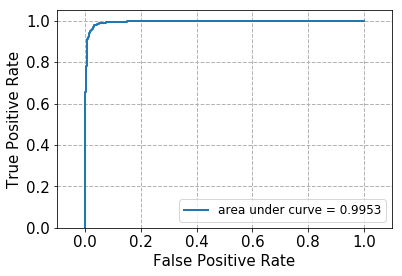

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])
    
       
    #print('recall: %s'%(recall_score(test_label,prob_value))
    #print ('accuracy: %s'+str(accuracy_score(test_label,prob_value)
    #print 'precision:'+str(precision_score(test_label,prob_value)
    plot_roc(fpr, tpr)
fit_predict_and_plot_roc(pipeline1, twenty_train.data, target2, twenty_test.data,target2_test)

In [46]:
from sklearn.metrics import f1_score
print("%-12s %f" % ('Accuracy:', accuracy_score(target2_test, predict)))
print("%-12s %f" % ('Precision:', precision_score(target2_test, predict, average='macro')))
print("%-12s %f" % ('Recall:', recall_score(target2_test, predict, average='macro')))
print("%-12s %f" % ('F1_score:', f1_score(target2_test, predict)))
print("Confusion Matrix: \n{0}".format(confusion_matrix(target2_test, predict)))


Accuracy:    0.970794
Precision:   0.970920
Recall:      0.970731
F1_score:    0.971250
Confusion Matrix: 
[[1504   56]
 [  36 1554]]


In [48]:
pipeline2 = Pipeline([
    ('vect', CountVectorizer(min_df=min_df,analyzer=stem_rmv_digit, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=0)),
    ('clf', SVC(kernel='linear', C=0.0001)),
])
pipeline2.fit(twenty_train.data, target2)
predict2 = pipeline2.predict(twenty_test.data)
print("%-12s %f" % ('Accuracy:', accuracy_score(target2_test, predict2)))
print("%-12s %f" % ('Precision:', precision_score(target2_test, predict2, average='macro')))
print("%-12s %f" % ('Recall:', recall_score(target2_test, predict2, average='macro')))
print("%-12s %f" % ('F1_score:', f1_score(target2_test, predict2)))
print("Confusion Matrix: \n{0}".format(confusion_matrix(target2_test, predict2)))


Accuracy:    0.504762
Precision:   0.252381
Recall:      0.500000
F1_score:    0.670886
Confusion Matrix: 
[[   0 1560]
 [   0 1590]]


/Users/yuqi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy:0.5047619047619047


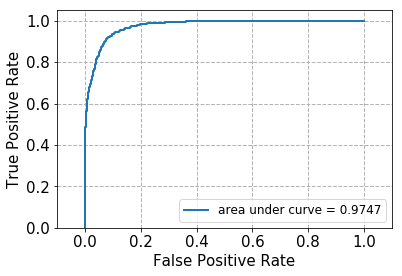

In [50]:
fit_predict_and_plot_roc(pipeline2, twenty_train.data, target2, twenty_test.data, target2_test)
print("accuracy:{}".format(accuracy_score(target2_test, predict2)))